In [1]:
!pip install nltk
!pip install sklearn
!pip install kaggle


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import numpy as ny
import pandas as pd
import nltk

import string

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"devilvamp17","key":"68b39c18732436f46a26c9faabaf6e3d"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d venky73/spam-mails-dataset

Dataset URL: https://www.kaggle.com/datasets/venky73/spam-mails-dataset
License(s): CC0-1.0
  0% 0.00/1.86M [00:00<?, ?B/s]
100% 1.86M/1.86M [00:00<00:00, 155MB/s]


In [6]:
import zipfile
with zipfile.ZipFile('/content/spam-mails-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

In [7]:
data=pd.read_csv('/content/dataset/spam_ham_dataset.csv')
print(data.head())

   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  


In [8]:
data['text']=data['text'].apply(lambda x: x.replace('\r\n',' '))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


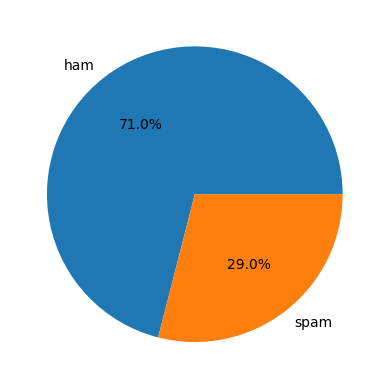

In [9]:
import matplotlib.pyplot as plt
plt.pie(data['label'].value_counts(), labels=data['label'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [10]:
stemmer= PorterStemmer()
corpus=[]

stopwords_set=stopwords.words('english')

for i in range(len(data)):
  text = data['text'].iloc[i].lower()
  text = text.translate(str.maketrans('', '', string.punctuation)).split()
  text = [stemmer.stem(word) for word in text if word not in stopwords_set]
  text = ' '.join(text)
  corpus.append(text)

In [13]:
vectorizer =TfidfVectorizer()
x = vectorizer.fit_transform(corpus).toarray()
y = data.label_num

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [25]:
# data acuuracy increment attempt
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [14]:
data.isnull().sum()

,0
Unnamed: 0,0
label,0
text,0
label_num,0


In [15]:
data.duplicated().sum()

0

In [16]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291 thi...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001 ( see at...",0
2,3624,ham,"Subject: neon retreat ho ho ho , we ' re aroun...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs this deal is to b...,0


In [17]:
from wordcloud import WordCloud
wc=WordCloud(width=50,height=50,min_font_size=10,background_color='white')
spam_wc = wc.generate(data[data['label_num']==1]['text'].str.cat(sep=" "))
ham_wc = wc.generate(data[data['label_num']==0]['text'].str.cat(sep=" "))

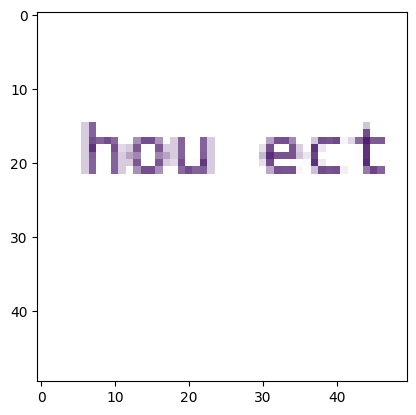

In [18]:
plt.imshow(spam_wc)

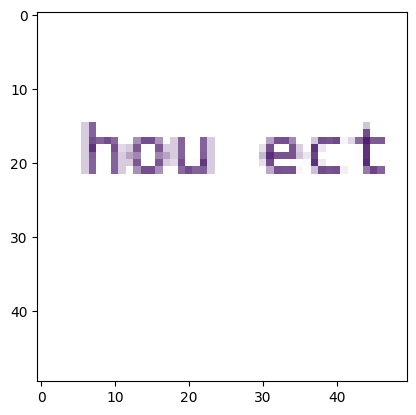

In [19]:
plt.imshow(ham_wc)

In [20]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [21]:
mnb=MultinomialNB()
gnb=GaussianNB()
bnb=BernoulliNB()
mnb.fit(x_train,y_train)
gnb.fit(x_train,y_train)
bnb.fit(x_train,y_train)
# y_pred=mnb.predict(x_test)
# print(accuracy_score(y_test,y_pred))
# print(confusion_matrix(y_test,y_pred))
# print(precision_score(y_test,y_pred))
y_pred=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
# y_pred=bnb.predict(x_test)
# print(accuracy_score(y_test,y_pred))
# print(confusion_matrix(y_test,y_pred))
# print(precision_score(y_test,y_pred))

0.9516908212560387
[[717  29]
 [ 21 268]]
0.9023569023569024


In [22]:
import pickle
pickle.dump(mnb,open('spam.pkl','wb'))
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))

In [23]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    ps=PorterStemmer()
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


In [24]:
input_sms="you just won a lottery of $1000"
transformed_sms = transform_text(input_sms)
vector_input = vectorizer.transform([transformed_sms])
# Convert the sparse matrix to a dense array
dense_vector_input = vector_input.toarray()
result = gnb.predict(dense_vector_input)[0]
if result == 1:
    print('Spam')
else:
    print('Not Spam')

Spam
